# LSTM을 이용한 교통 흐름 예측

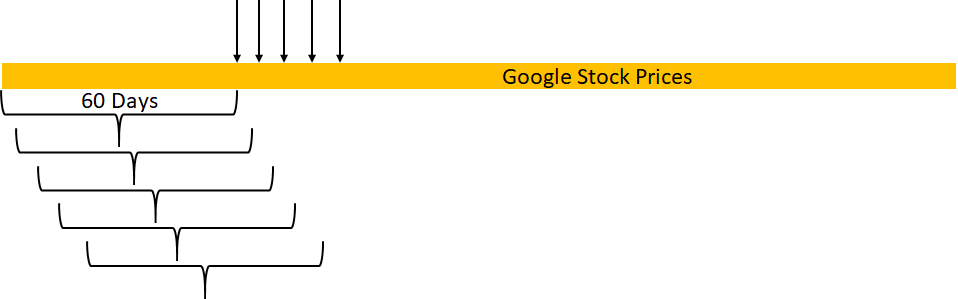

# VDS 데이터를 이용한 교통 흐름 예측 모델 단계 

- Data Preprocessing
- Building the RNN
- Making the prediction and visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
from pandas import datetime
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M')

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [5]:
df = pd.read_csv('./daejeon_vds16.csv',  date_parser=parser)

In [6]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [7]:
df.shape

(8064, 7)

In [8]:
df.tail()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
8059,2017-04-29 23:35,45,35,10,0,51.3,2.01
8060,2017-04-29 23:40,47,33,14,0,53.9,1.89
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74


## 정규화를 위하여 'Data' 특성을 제외하자

In [44]:
train = df[df['Date'] <'2017-04-28'].copy() 
test = df[df['Date'] >='2017-04-28'].copy()

### Traffic Volume 

In [46]:
train_vol = train.drop(['Date','Speed','SmVol','MeVol','LaVol','Occ.Rate'], axis = 1)
test_vol  = test.drop(['Date','Speed','SmVol','MeVol','LaVol','Occ.Rate'], axis = 1)

In [47]:
train_vol.head()

,ToVol
0,43
1,45
2,46
3,45
4,27


## 정규화 

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
data_training = scaler.fit_transform(train_vol)
data_test = scaler.fit_transform(test_vol)

In [55]:
data_training.shape

(7488, 1)

In [56]:
data_test.shape

(576, 1)

# RNN을 위하여 데이터를 재구성하자.
### Loop_Back = 60으로 설정하자.
### 예측은 단일 예측 1개로 즉, 5분단위
create RNN with 60 timesteps, i.e. look 60 previous time steps

In [66]:
X_train = []
y_train = []
X_test = []
y_test = []

### train 데이터를 RNN 구조로 만들자

In [67]:
look_back = 60
for i in range(look_back, data_training.shape[0]):
    X_train.append(data_training[i-look_back:i])
    y_train.append(data_training[i, 0])

In [68]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [69]:
print(X_train.shape,y_train.shape)

(7428, 60, 1) (7428,)


### test 데이터에도 같은 구조로 해주자

In [70]:
for i in range(look_back, data_test.shape[0]):
    X_test.append(data_test[i-look_back:i])
    y_test.append(data_test[i, 0])

In [71]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [72]:
X_test.shape, y_test.shape

((516, 60, 1), (516,))

### Building LSTM 

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [75]:
neuron1 = 64
neuron2 = 128

model = Sequential()
model.add(LSTM(units = neuron1, activation = 'relu', return_sequences = True,
               input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = neuron2, activation = 'sigmoid'))

model.add(Dense(units = 1))

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 115,841
Trainable params: 115,841
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam', loss = 'mean_squared_error',
             metrics =['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, epochs=20, batch_size=256)

Epoch 1/20
30/30 [==============================] - 29s 909ms/step - loss: 0.5457 - accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 28s 919ms/step - loss: 0.1269 - accuracy: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 27s 911ms/step - loss: 0.1158 - accuracy: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 28s 933ms/step - loss: 0.1054 - accuracy: 0.0000e+00
Epoch 5/20
30/30 [==============================] - 27s 908ms/step - loss: 0.1489 - accuracy: 0.0000e+00
Epoch 6/20
30/30 [==============================] - 27s 912ms/step - loss: 0.1265 - accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 28s 940ms/step - loss: 0.1116 - accuracy: 0.0000e+00
Epoch 8/20
30/30 [==============================] - 28s 917ms/step - loss: 0.1118 - accuracy: 0.0000e+00
Epoch 9/20
30/30 [==============================] - 27s 914ms/step - loss: 0.1316 - accuracy: 0.0000e+00
Epoch 10/20
30/30 [==============================] - 28

In [ ]:
print(history.history)

In [ ]:
history.history.keys()

### Prepare test dataset 

In [ ]:
#X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
#X_test.shape, y_test.shape

In [ ]:
model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [37]:
scaler.scale_

array([61.54378554])

In [38]:
#scale = 1/8.18605127e-04
scale = 1/0.01547988

In [39]:
y_pred = y_pred*scale
y_test = y_test*scale

In [40]:
y_pred

array([[-9.79537735e+01],
       [-9.57393188e+01],
       [-9.43796921e+01],
       [-9.18975067e+01],
       [-8.87647171e+01],
       [-8.40187683e+01],
       [-7.86094055e+01],
       [-7.57954025e+01],
       [-6.96403732e+01],
       [-6.49930420e+01],
       [-6.17388725e+01],
       [-5.76209412e+01],
       [-5.09964256e+01],
       [-4.47364960e+01],
       [-3.79475136e+01],
       [-3.37851257e+01],
       [-3.06807022e+01],
       [-1.99742298e+01],
       [-9.89188957e+00],
       [-1.18269312e+00],
       [ 6.28955555e+00],
       [ 1.89366570e+01],
       [ 2.46571865e+01],
       [ 2.92584686e+01],
       [ 3.25279770e+01],
       [ 3.14930515e+01],
       [ 3.98025856e+01],
       [ 4.88647728e+01],
       [ 5.82993202e+01],
       [ 7.18422928e+01],
       [ 8.16416321e+01],
       [ 9.58154907e+01],
       [ 1.13007332e+02],
       [ 1.15233482e+02],
       [ 1.24404060e+02],
       [ 1.16651100e+02],
       [ 1.25618446e+02],
       [ 1.21027245e+02],
       [ 1.1

### Visualization 

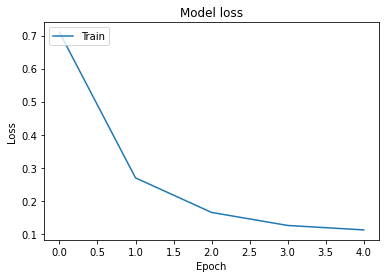

In [42]:
# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

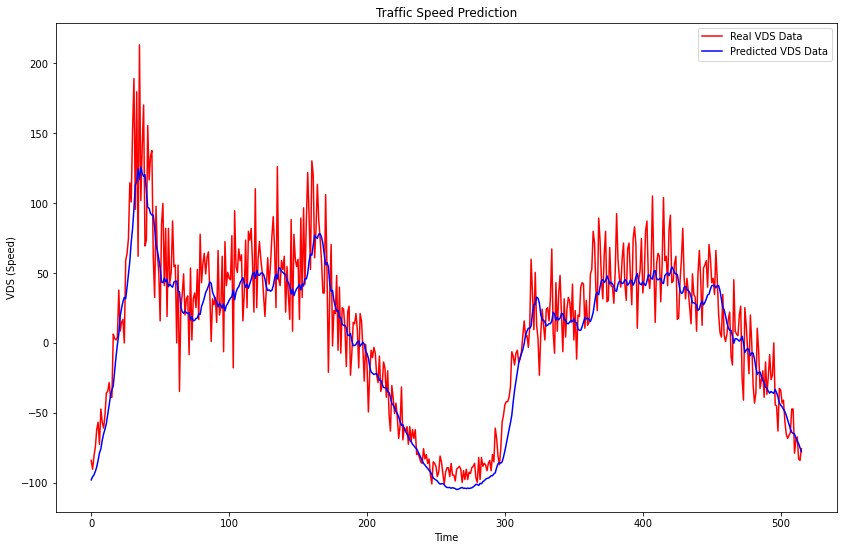

In [43]:
# Visualising the results
plt.figure(figsize=(14,9))
plt.plot(y_test, color = 'red', label = 'Real VDS Data')
plt.plot(y_pred, color = 'blue', label = 'Predicted VDS Data')
plt.title('Traffic Speed Prediction')
plt.xlabel('Time')
plt.ylabel('VDS (Speed)')
plt.legend()
plt.show()